# Homework: Table Manipulation and Visualization



Please complete this notebook by filling in the cells provided. Before you begin, execute the previous cell to load the provided tests.<br>

#### Helpful Resource:<br>
- Python Reference: Cheat sheet of helpful array & table methods used in Data 8! <br>
#### Recommended Reading <br>
- Visualization <br>
For all problems that you must write explanations and sentences for, you must provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use max_temperature in your answer to one question, do not reassign it later on. <br>
#### Deadline:
This assignment is due Sunday, 2/27 at 11:59pm PT. <br>
Directly sharing answers is not okay, but discussing problems with the other students is encouraged. 

In [1]:
# Don't change this cell; just run it. Include at the start of your code

import numpy as np
from datascience import *
import warnings
warnings.simplefilter('ignore', FutureWarning)

# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')



## 1. Unemployment
The Great Recession of 2008-2009 was a period of economic decline observed globally, with scale and timing varying from country to country. In the United States, it resulted in a rapid rise in unemployment that affected industries and population groups to different extents.<br>
The Federal Reserve Bank of St. Louis publishes data about jobs in the US. Below, we've loaded data on unemployment in the United States. There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate: <br>
1. Among people who are able to work and are looking for a full-time job, the percentage who can't find a job. This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, the percentage who can't find any job or are only working at a part-time job. The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER. 



#### Question 1. 
The data are in a CSV file called unemployment.csv. Load that file into a table called unemployment. (4 Points)

In [2]:
unemployment = Table.read_table('unemployment.csv')
unemployment

Date,NEI,NEI-PTER
1994-01-01,10.0974,11.172
1994-04-01,9.6239,10.7883
1994-07-01,9.3276,10.4831
1994-10-01,9.1071,10.2361
1995-01-01,8.9693,10.1832
1995-04-01,9.0314,10.1071
1995-07-01,8.9802,10.1084
1995-10-01,8.9932,10.1046
1996-01-01,9.0002,10.0531
1996-04-01,8.9038,9.9782


#### Question 2. 
Sort the data in descending order by NEI, naming the sorted table by_nei. Create another table called by_nei_pter that's sorted in descending order by NEI-PTER instead. 

In [67]:
by_nei = unemployment.sort("NEI", descending = True)
by_nei_pter = unemployment.sort("NEI-PTER", descending = True)

In [68]:
# Run this cell to check your by_nei table. You do not need to change the code.
by_nei.show(5)
# Run this cell to check your by_nei_pter table. You do not need to change the code.
by_nei_pter.show(5)


Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664


Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2009-07-01,10.8089,12.7404
2010-01-01,10.9054,12.7311
2010-04-01,10.6597,12.5664
2009-04-01,10.7082,12.5497


#### Question 3. 
Use take to make a table containing the data for the 11 quarters when NEI was greatest. Call that table greatest_nei. <br>
greatest_nei should be sorted in descending order of NEI. Note that each row of unemployment represents a quarter. 


In [59]:
greatest_nei = by_nei.take(np.arange(0,10))
greatest_nei


Date,NEI,NEI-PTER
2009-10-01,10.9698,12.8557
2010-01-01,10.9054,12.7311
2009-07-01,10.8089,12.7404
2009-04-01,10.7082,12.5497
2010-04-01,10.6597,12.5664
2010-10-01,10.5856,12.4329
2010-07-01,10.5521,12.3897
2011-01-01,10.5024,12.3017
2011-07-01,10.4856,12.2507
2011-04-01,10.4409,12.247


#### Question 4. 
It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009. NEI-PTER is the percentage of people who are unemployed (included in the NEI) plus the percentage of people who are PTER. <br>
Compute an array containing the percentage of people who were PTER in each quarter. (The first element of the array should correspond to the first row of unemployment, and so on.) 
Note: Use the original unemployment table for this.

In [66]:
pter = unemployment.column(2)-unemployment.column(1)
pter


array([1.0746, 1.1644, 1.1555, 1.129 , 1.2139, 1.0757, 1.1282, 1.1114,
       1.0529, 1.0744, 1.1004, 1.0747, 1.0705, 1.0455, 1.008 , 0.9734,
       0.9753, 0.8931, 0.9451, 0.8367, 0.8208, 0.8105, 0.8248, 0.7578,
       0.7251, 0.7445, 0.7543, 0.7423, 0.7399, 0.7687, 0.8418, 0.9923,
       0.9181, 0.9629, 0.9703, 0.9575, 1.0333, 1.0781, 1.0675, 1.0354,
       1.0601, 1.01  , 1.0042, 1.0368, 0.9704, 0.923 , 0.9759, 0.93  ,
       0.889 , 0.821 , 0.9409, 0.955 , 0.898 , 0.8948, 0.9523, 0.9579,
       1.0149, 1.0762, 1.2873, 1.4335, 1.7446, 1.8415, 1.9315, 1.8859,
       1.8257, 1.9067, 1.8376, 1.8473, 1.7993, 1.8061, 1.7651, 1.7927,
       1.7286, 1.6387, 1.6808, 1.6805, 1.6629, 1.6253, 1.6477, 1.6298,
       1.4796, 1.5131, 1.4866, 1.4345, 1.3675, 1.3097, 1.2319, 1.1735,
       1.1844, 1.1746])

#### Question 5. 
Add pter as a column to unemployment (name the column PTER) and sort the resulting table by that column in descending order. Call the resulting table by_pter. <br>
Try to do this with a single line of code, if you can. 

In [64]:
by_pter = unemployment.with_column('PTER',pter).sort('PTER', descending = True)
by_pter

Date,NEI,NEI-PTER,PTER
2009-07-01,10.8089,12.7404,1.9315
2010-04-01,10.6597,12.5664,1.9067
2009-10-01,10.9698,12.8557,1.8859
2010-10-01,10.5856,12.4329,1.8473
2009-04-01,10.7082,12.5497,1.8415
2010-07-01,10.5521,12.3897,1.8376
2010-01-01,10.9054,12.7311,1.8257
2011-04-01,10.4409,12.247,1.8061
2011-01-01,10.5024,12.3017,1.7993
2011-10-01,10.3287,12.1214,1.7927


#### Question 6. 
Create a line plot of PTER over time. To do this, create a new table called pter_over_time by making a copy of the unemployment table and adding two new columns: Year and PTER using the year array and the pter array, respectively. Then, generate a line plot using one of the table methods you've learned in class.<br>

The order of the columns matter, so be sure Year comes before PTER. <br>
Note: When constructing pter_over_time, do not just add the year column to the by_pter table. Please follow the directions in the question above. <br>


In [92]:
year = 1994 + np.arange(by_pter.num_rows)/4
pter_over_time = unemployment.with_columns("Year",year,"PTER",pter)
pter_over_time

Date,NEI,NEI-PTER,Year,PTER
1994-01-01,10.0974,11.172,1994,1.0746
1994-04-01,9.6239,10.7883,1994.25,1.1644
1994-07-01,9.3276,10.4831,1994.5,1.1555
1994-10-01,9.1071,10.2361,1994.75,1.129
1995-01-01,8.9693,10.1832,1995,1.2139
1995-04-01,9.0314,10.1071,1995.25,1.0757
1995-07-01,8.9802,10.1084,1995.5,1.1282
1995-10-01,8.9932,10.1046,1995.75,1.1114
1996-01-01,9.0002,10.0531,1996,1.0529
1996-04-01,8.9038,9.9782,1996.25,1.0744


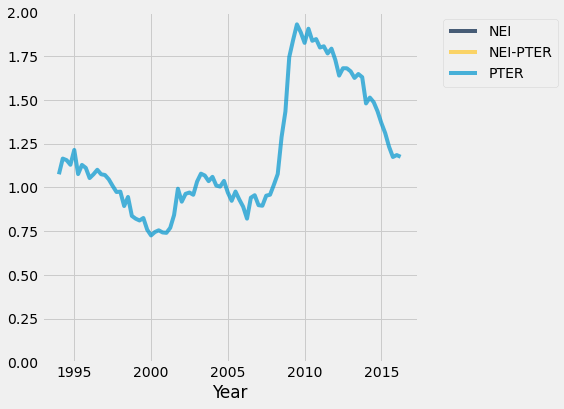

In [97]:
pter_over_time.drop("Date").plot("Year")
plots.ylim(0,2); # Do not change this line

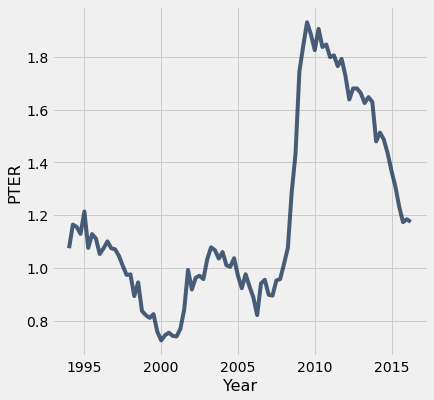

In [98]:
plot_table = pter_over_time.select('Year', 'PTER')
plot_table.plot('Year')

## 2 Birth Rates

The following table gives Census-based population estimates for each US state on both July 1, 2015 and July 1, 2016. The last four columns describe the components of the estimated change in population during this time interval. For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico and the District of Columbia. <br>
The data was taken from here https://www2.census.gov/programs-surveys/popest/datasets/2010-2016/national/totals/nst-est2016-alldata.csv. (Note: If it doesn't download for you when you click the link, please copy and paste it into your address bar!) <br>
The raw data is a bit messy—run the cell below to clean the table and make it easier to work with.


In [41]:
# Don't change this cell; just run it.
pop = Table.read_table('nst-est2016-alldata.csv').where('SUMLEV', 40).select([1, 4, 12, 13, 27, 34, 62, 69])
pop = pop.relabeled('POPESTIMATE2015', '2015').relabeled('POPESTIMATE2016', '2016')
pop = pop.relabeled('BIRTHS2016', 'BIRTHS').relabeled('DEATHS2016', 'DEATHS')
pop = pop.relabeled('NETMIG2016', 'MIGRATION').relabeled('RESIDUAL2016', 'OTHER')
pop = pop.with_columns("REGION", np.array([int(region) if region != "X" else 0 for region in pop.column("REGION")]))
pop.set_format([2, 3, 4, 5, 6, 7], NumberFormatter(decimals=0)).show(5)


REGION,NAME,2015,2016,BIRTHS,DEATHS,MIGRATION,OTHER
3,Alabama,"4,853,875","4,863,300","58,556","52,405","3,874",-600
4,Alaska,"737,709","741,894","11,255","4,511","-2,557",-2
4,Arizona,"6,817,565","6,931,071","87,204","56,564","76,405","6,461"
3,Arkansas,"2,977,853","2,988,248","37,936","30,581","3,530",-490
4,California,"38,993,940","39,250,017","502,848","273,850","33,530","-6,451"


#### Question 1. 
Assign us_birth_rate to the total US annual birth rate during this time interval. The annual birth rate for a year-long period is the total number of births in that period as a proportion of the total population size at the start of the time period. <br>
Hint: Which year corresponds to the start of the time period?


In [44]:
us_birth_rate = sum(pop.column("BIRTHS") / pop.column("2015")) /len(pop.column("NAME"))
us_birth_rate

0.01232821678238599

#### Question 2. 
Assign west_births to the total number of births that occurred in region 4 (the Western US). <br>
Hint: Make sure you double check the type of the values in the REGION column and appropriately filter (i.e. the types must match!).

In [48]:
west_births = pop.where("REGION", 4).column("BIRTHS")
west_births = sum(west_births)
west_births


979657

#### Question 3. 
In the next question, you will be creating a visualization to understand the relationship between birth and death rates. The annual death rate for a year-long period is the total number of deaths in that period as a proportion of the population size at the start of the time period. <br>
What visualization is most appropriate to see if there is an association between birth and death rates during a given time interval?
1.	Line Graph
2.	Bar Chart
3.	Scatter Plot
Assign visualization below to the number corresponding to the correct visualization. 



In [ ]:
visualization = 3


#### Question 5. 
In the code cell below, create a visualization that will help us determine if there is an association between birth rate and death rate during this time interval. It may be helpful to create an intermediate table here. (4 Points)
Things to consider: <br>
•	What type of chart will help us illustrate an association between 2 variables? <br>
•	How can you manipulate a certain table to help generate your chart?


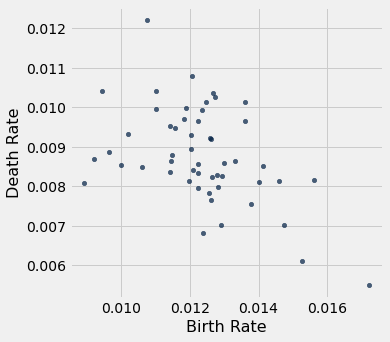

In [54]:
#In this cell, use birth_rates and death_rates to generate your visualization
birth_rates = pop.column('BIRTHS') / pop.column('2015')
death_rates = pop.column('DEATHS') / pop.column('2015')
main = Table().with_columns("Birth Rate",birth_rates,"Death Rate",death_rates)
main.scatter("Birth Rate", "Death Rate")

#### Question 6. 
True or False: There is an association between birth rate and death rate during this time interval.<br>
Assign assoc to True or False in the cell below. 


In [ ]:
assoc = True